In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import model
import numpy as np

In [2]:
train_directory = "train"
image_paths = []
classifications = []
random.seed(0)
num_classes = 0

for subdirectory in os.listdir(train_directory):
    if(subdirectory == "code"):
        continue
    print(subdirectory)
    num_classes += 1
    for image_name in os.listdir(os.path.join(train_directory, subdirectory)):
        image_path = os.path.join(train_directory, subdirectory, image_name)
        image_paths.append(image_path)
        classifications.append(subdirectory)

# Stack image_paths and classifications vertically to create a structured array
training_data = np.column_stack((image_paths, classifications))

# If you want to shuffle the data, you can do it like this
random.shuffle(training_data)

case
cpu
gpu
hdd
monitor
motherboard
mouse
ram


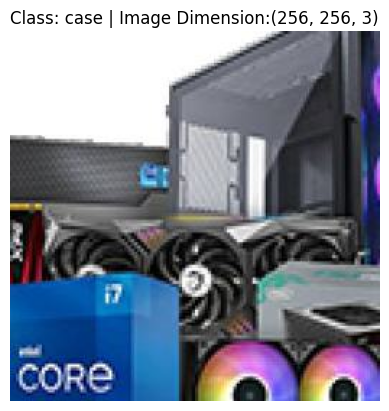

In [3]:
index = 0

img = mping.imread(training_data[index][0])
plt.imshow(img)
plt.axis('off')
plt.title("Class: " +  training_data[index][1] + " | Image Dimension:" + str(img.shape))
plt.show()

In [4]:
processed_images = []
labels = []
batch_size = 32

for row in training_data:
    # Load image path and label from each row
    image_path, label = row

    # Load image and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0,1]

    # Append preprocessed image and label to lists
    processed_images.append(img_array)
    labels.append(label)

In [10]:
one_hot_encoder = OneHotEncoder()
labels_one_hot = one_hot_encoder.fit_transform(np.array(labels).reshape(-1, 1)).toarray()
train_images, val_images, train_labels, val_labels = train_test_split(
    processed_images, labels_one_hot, test_size=0.1, random_state=0
)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=len(train_images)).batch(batch_size)
validation_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).shuffle(buffer_size=len(val_images)).batch(batch_size)

Image shape: (224, 224, 3)
Label: 0


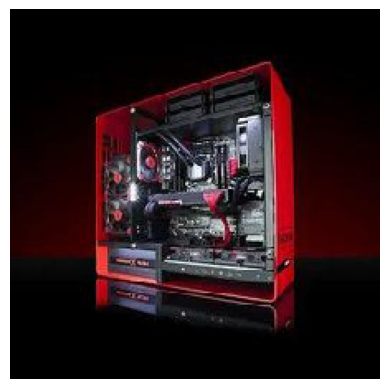

Image shape: (224, 224, 3)
Label: 4


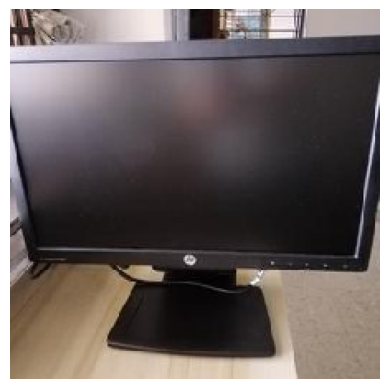

In [11]:
for image_batch, label_batch in train_dataset.take(1):
    # Assuming the first element in the batch is an image and the second is its label
    image = image_batch[0]
    label = label_batch[0]  # Assuming labels are one-hot encoded

    # Convert one-hot encoded label back to categorical
    categorical_label = np.argmax(label)

    # Print the shape of the image and its corresponding label
    print("Image shape:", image.shape)
    print("Label:", categorical_label)

    # Plot the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

for image_batch, label_batch in validation_dataset.take(1):
    # Assuming the first element in the batch is an image and the second is its label
    image = image_batch[0]
    label = label_batch[0]  # Assuming labels are one-hot encoded

    # Convert one-hot encoded label back to categorical
    categorical_label = np.argmax(label)

    # Print the shape of the image and its corresponding label
    print("Image shape:", image.shape)
    print("Label:", categorical_label)

    # Plot the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [12]:
classifier = model.ResNetClassifier(num_classes)
classifier.compile_model()


In [15]:
classifier.fit(train_dataset, batch_size=32, epochs=10, validation_dataset)

TypeError: ResNetClassifier.fit() got multiple values for argument 'batch_size'